In [30]:
import numpy as np
import pandas as pd
import pickle
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\USER\Downloads\E Commerce churn Dataset.xlsx")

In [3]:
df['PreferredLoginDevice'].replace({'Mobile Phone':'Mobile', 'Phone':'Mobile'}, inplace=True)
df['WarehouseToHome'].replace({126:26, 127:27}, inplace=True)
df['PreferredPaymentMode'].replace({'Credit Card':'CC', 'Cash on Delivery':'COD', 'Debit Card':'DC' }, inplace=True)
df['PreferedOrderCat'].replace({'Mobile Phone':'Mobile', 'Laptop & Accessory':'Laptop'}, inplace=True)

In [4]:
round(df.HourSpendOnApp.mean()), round(df.Tenure.mean()), round(df.OrderAmountHikeFromlastYear.mean()), round(df.WarehouseToHome.mean())

(3, 10, 16, 16)

In [5]:
df.CouponUsed.median(), df.OrderCount.median(), df.DaySinceLastOrder.median()

(1.0, 2.0, 3.0)

In [6]:
# Fill missing values ith mean and median
df.fillna({'HourSpendOnApp':round(df.HourSpendOnApp.mean()),
           'Tenure':round(df.Tenure.mean()),
           'OrderAmountHikeFromlastYear':round(df.OrderAmountHikeFromlastYear.mean()),
           'WarehouseToHome':round(df.WarehouseToHome.mean()),
           'CouponUsed':df.CouponUsed.median(),
           'OrderCount':df.OrderCount.median(),
           'DaySinceLastOrder':df.DaySinceLastOrder.median()}, inplace=True)

In [7]:
percentile = df.Tenure.quantile([0.99]).values
df['Tenure'] = df['Tenure'].apply(lambda x : percentile[0] if x > percentile[0] else x)

In [8]:
percentile = df.DaySinceLastOrder.quantile([0.99]).values
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].apply(lambda x : percentile[0] if x > percentile[0] else x)

In [9]:
percentile = df.CashbackAmount.quantile([0.01, 0.99]).values
df['CashbackAmount'] = df['CashbackAmount'].apply(lambda x : percentile[0] if x < percentile[0] else percentile[1] if x > percentile[1] else x)

In [10]:
# Generating new features from cashback amount divided order count
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [11]:
dt=df['CustomerID']

In [12]:
df.drop(columns=['CustomerID', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount'], axis=1, inplace=True)

In [13]:
le =LabelEncoder()
df['Gender'] =le.fit_transform(df['Gender'])
df['MaritalStatus'] =le.fit_transform(df['MaritalStatus'])
df['PreferredLoginDevice'] =le.fit_transform(df['PreferredLoginDevice'])

In [14]:
cat=['PreferredPaymentMode','PreferedOrderCat']

In [15]:
df_encoded= pd.get_dummies(df,columns=cat)
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_DC,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,1,4.0,1,3,6.0,0,3,2,2,9,...,0,0,1,0,0,0,0,1,0,0
1,1,10.0,1,1,8.0,1,4,3,2,7,...,0,0,0,0,1,0,0,0,1,0
2,1,10.0,1,1,30.0,1,4,3,2,6,...,0,0,1,0,0,0,0,0,1,0
3,1,0.0,1,3,15.0,1,4,5,2,8,...,0,0,1,0,0,0,0,1,0,0
4,1,0.0,1,1,12.0,1,3,5,2,3,...,1,0,0,0,0,0,0,0,1,0


In [41]:
df_encoded.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_DC', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others'],
      dtype='object')

In [16]:
# Separate dependent and independent variables
X = df_encoded.drop('Churn', axis=1)
y= df_encoded.Churn

In [17]:
# Load the machine learning model
model = pickle.load(open(r'D:\ecommerce_churn\model_rf.pkl', 'rb'))

In [18]:
test=model.predict(X)

In [35]:
df['prediction']=pd.DataFrame(test)

In [36]:
df


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,prediction
0,1,4.0,1,3,6.0,DC,0,3,Laptop,2,2,9,1,5.0,159.93,159.930,1
1,1,10.0,1,1,8.0,UPI,1,4,Mobile,3,2,7,1,0.0,120.90,120.900,1
2,1,10.0,1,1,30.0,DC,1,4,Mobile,3,2,6,1,3.0,120.28,120.280,1
3,1,0.0,1,3,15.0,DC,1,4,Laptop,5,2,8,0,3.0,134.07,134.070,1
4,1,0.0,1,1,12.0,CC,1,3,Mobile,5,2,3,0,3.0,129.60,129.600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,0,1,30.0,CC,1,2,Laptop,1,1,6,0,4.0,150.71,75.355,0
5626,0,13.0,1,1,13.0,CC,1,5,Fashion,5,1,6,0,3.0,224.91,112.455,0
5627,0,1.0,1,1,11.0,DC,1,2,Laptop,4,1,3,1,4.0,186.42,93.210,0
5628,0,23.0,0,3,9.0,CC,1,5,Laptop,4,1,4,0,9.0,178.90,89.450,0


In [38]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [37]:
df["prediction"].value_counts()

0    4665
1     965
Name: prediction, dtype: int64

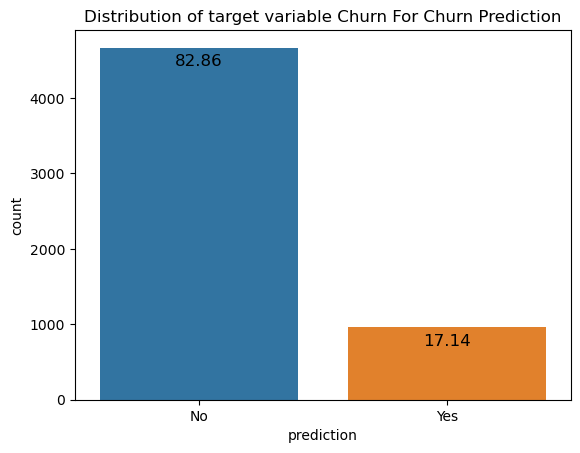

In [31]:
#churn rate
ax = sns.countplot(x='prediction', data=df)
x_labels= ['No', 'Yes']



ax.set_xticklabels(x_labels)
plt.title('Distribution of target variable Churn For Churn Prediction')

for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

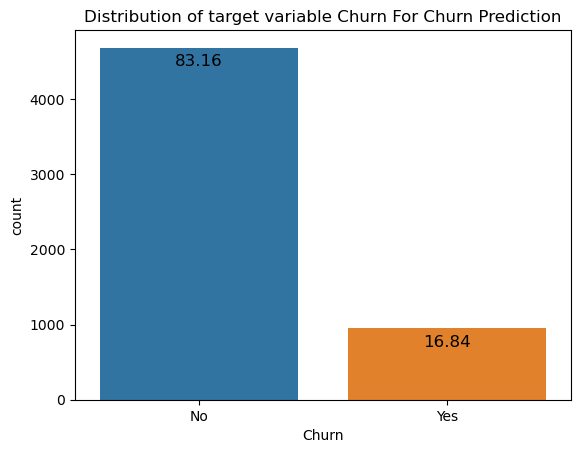

In [39]:
#churn rate
ax = sns.countplot(x='Churn', data=df)
x_labels= ['No', 'Yes']



ax.set_xticklabels(x_labels)
plt.title('Distribution of target variable Churn For Churn Prediction')

for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')

In [40]:
df.to_csv('D:/ecommerce_churn/model_pred.csv')